<a href="https://colab.research.google.com/github/AmrMKayid/KayMo/blob/master/KayMo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import wave
import time
import keras
import shutil
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm
from datetime import datetime
from collections import defaultdict, Counter
from keras import models, layers, losses, callbacks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


KAYMODB_PATH = f'datasets/kaymodb/'
KAYMODB_PATH

Using TensorFlow backend.


'datasets/kaymodb/'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Data from Google Drive

In [0]:
!cp drive/My\ Drive/amr@navelrobotics/kay.zip .

In [0]:
!unzip kay.zip

In [0]:
!cp -r kay/KayMo/datasets datasets/

# Download Raw datasets

In [0]:
!wget http://www.emodb.bilderbar.info/download/download.zip -O emodb.zip

--2019-09-19 14:16:26--  http://www.emodb.bilderbar.info/download/download.zip
Resolving www.emodb.bilderbar.info (www.emodb.bilderbar.info)... 85.13.147.80
Connecting to www.emodb.bilderbar.info (www.emodb.bilderbar.info)|85.13.147.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40567066 (39M) [application/zip]
Saving to: ‘emodb.zip’

emodb.zip           100%[===================>]  38.69M  7.89MB/s    in 5.5s    

2019-09-19 14:16:32 (6.99 MB/s) - ‘emodb.zip’ saved [40567066/40567066]



In [0]:
!wget https://zenodo.org/record/1188976/files/Audio_Song_Actors_01-24.zip?download=1 -O ravdess_songs.zip

--2019-09-19 14:16:34--  https://zenodo.org/record/1188976/files/Audio_Song_Actors_01-24.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.65.20
Connecting to zenodo.org (zenodo.org)|188.184.65.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 225505317 (215M) [application/octet-stream]
Saving to: ‘ravdess_songs.zip’

ravdess_songs.zip   100%[===================>] 215.06M  24.5MB/s    in 10s     

2019-09-19 14:16:45 (21.3 MB/s) - ‘ravdess_songs.zip’ saved [225505317/225505317]



In [0]:
!wget https://zenodo.org/record/1188976/files/Audio_Speech_Actors_01-24.zip?download=1 -O ravdess_speech.zip

--2019-09-19 14:16:47--  https://zenodo.org/record/1188976/files/Audio_Speech_Actors_01-24.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.65.20
Connecting to zenodo.org (zenodo.org)|188.184.65.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 208468073 (199M) [application/octet-stream]
Saving to: ‘ravdess_speech.zip’

ravdess_speech.zip  100%[===================>] 198.81M  20.3MB/s    in 9.5s    

2019-09-19 14:16:57 (21.0 MB/s) - ‘ravdess_speech.zip’ saved [208468073/208468073]



In [0]:
!wget --user guest2savee --password welcome! http://kahlan.eps.surrey.ac.uk/savee/Data/Zip/AudioData.zip -O savee.zip

--2019-09-19 14:16:58--  http://kahlan.eps.surrey.ac.uk/savee/Data/Zip/AudioData.zip
Resolving kahlan.eps.surrey.ac.uk (kahlan.eps.surrey.ac.uk)... 131.227.95.16
Connecting to kahlan.eps.surrey.ac.uk (kahlan.eps.surrey.ac.uk)|131.227.95.16|:80... connected.
HTTP request sent, awaiting response... 401 Unauthorized
Authentication selected: Basic realm="Secure SAVEE Database"
Reusing existing connection to kahlan.eps.surrey.ac.uk:80.
HTTP request sent, awaiting response... 200 OK
Length: 113281384 (108M) [application/zip]
Saving to: ‘savee.zip’

savee.zip           100%[===================>] 108.03M  28.5MB/s    in 4.2s    

2019-09-19 14:17:02 (25.9 MB/s) - ‘savee.zip’ saved [113281384/113281384]



In [0]:
!cp drive/My\ Drive/KayMo/tess.zip .

In [0]:
!mkdir datasets datasets/emodb datasets/ravdess datasets/savee datasets/tess models

In [0]:
!unzip emodb.zip -d datasets/emodb

Archive:  emodb.zip
   creating: datasets/emodb/lablaut/
  inflating: datasets/emodb/lablaut/14a04Lbxx.lablaut  
  inflating: datasets/emodb/lablaut/03a07Fbxx.lablaut  
  inflating: datasets/emodb/lablaut/16b03Faxx.lablaut  
  inflating: datasets/emodb/lablaut/15a05Lbxx.lablaut  
  inflating: datasets/emodb/lablaut/16a02Lbxx.lablaut  
  inflating: datasets/emodb/lablaut/14a04Aaxx.lablaut  
  inflating: datasets/emodb/lablaut/12b03Taxx.lablaut  
  inflating: datasets/emodb/lablaut/16a05Laxx.lablaut  
  inflating: datasets/emodb/lablaut/16b03Taxx.lablaut  
  inflating: datasets/emodb/lablaut/11a05Fcxx.lablaut  
  inflating: datasets/emodb/lablaut/03a02Taxx.lablaut  
  inflating: datasets/emodb/lablaut/09b03Edxx.lablaut  
  inflating: datasets/emodb/lablaut/12a01Fbxx.lablaut  
  inflating: datasets/emodb/lablaut/10a02Faxx.lablaut  
  inflating: datasets/emodb/lablaut/08a04Tbxx.lablaut  
  inflating: datasets/emodb/lablaut/09a05Tbxx.lablaut  
  inflating: datasets/emodb/lablaut/09b03Wbxx.l

In [0]:
!unzip savee.zip -d datasets/savee
!mv datasets/savee/AudioData/* datasets/savee/ 
! rm -rf datasets/savee/AudioData/

Archive:  savee.zip
   creating: datasets/savee/AudioData/
   creating: datasets/savee/AudioData/DC/
  inflating: datasets/savee/AudioData/DC/a01.wav  
  inflating: datasets/savee/AudioData/DC/a02.wav  
  inflating: datasets/savee/AudioData/DC/a03.wav  
  inflating: datasets/savee/AudioData/DC/a04.wav  
  inflating: datasets/savee/AudioData/DC/a05.wav  
  inflating: datasets/savee/AudioData/DC/a06.wav  
  inflating: datasets/savee/AudioData/DC/a07.wav  
  inflating: datasets/savee/AudioData/DC/a08.wav  
  inflating: datasets/savee/AudioData/DC/a09.wav  
  inflating: datasets/savee/AudioData/DC/a10.wav  
  inflating: datasets/savee/AudioData/DC/a11.wav  
  inflating: datasets/savee/AudioData/DC/a12.wav  
  inflating: datasets/savee/AudioData/DC/a13.wav  
  inflating: datasets/savee/AudioData/DC/a14.wav  
  inflating: datasets/savee/AudioData/DC/a15.wav  
  inflating: datasets/savee/AudioData/DC/d01.wav  
  inflating: datasets/savee/AudioData/DC/d02.wav  
  inflating: datasets/savee/Audi

In [0]:
!mkdir datasets/ravdess/songs datasets/ravdess/speech
!unzip ravdess_songs.zip -d datasets/ravdess/songs
!unzip ravdess_speech.zip -d datasets/ravdess/speech/

Archive:  ravdess_songs.zip
   creating: datasets/ravdess/songs/Actor_01/
  inflating: datasets/ravdess/songs/Actor_01/03-02-01-01-01-01-01.wav  
  inflating: datasets/ravdess/songs/Actor_01/03-02-01-01-01-02-01.wav  
  inflating: datasets/ravdess/songs/Actor_01/03-02-01-01-02-01-01.wav  
  inflating: datasets/ravdess/songs/Actor_01/03-02-01-01-02-02-01.wav  
  inflating: datasets/ravdess/songs/Actor_01/03-02-02-01-01-01-01.wav  
  inflating: datasets/ravdess/songs/Actor_01/03-02-02-01-01-02-01.wav  
  inflating: datasets/ravdess/songs/Actor_01/03-02-02-01-02-01-01.wav  
  inflating: datasets/ravdess/songs/Actor_01/03-02-02-01-02-02-01.wav  
  inflating: datasets/ravdess/songs/Actor_01/03-02-02-02-01-01-01.wav  
  inflating: datasets/ravdess/songs/Actor_01/03-02-02-02-01-02-01.wav  
  inflating: datasets/ravdess/songs/Actor_01/03-02-02-02-02-01-01.wav  
  inflating: datasets/ravdess/songs/Actor_01/03-02-02-02-02-02-01.wav  
  inflating: datasets/ravdess/songs/Actor_01/03-02-03-01-01-01

In [0]:
!unzip tess.zip -d datasets/tess

Archive:  tess.zip
  inflating: datasets/tess/YAF_dab_disgust.wav  
  inflating: datasets/tess/OAF_yes_happy.wav  
  inflating: datasets/tess/OAF_lean_fear.wav  
  inflating: datasets/tess/YAF_pole_ps.wav  
  inflating: datasets/tess/YAF_fit_happy.wav  
  inflating: datasets/tess/YAF_time_neutral.wav  
  inflating: datasets/tess/YAF_road_disgust.wav  
  inflating: datasets/tess/YAF_keep_ps.wav  
  inflating: datasets/tess/OAF_mop_ps.wav  
  inflating: datasets/tess/OAF_pain_sad.wav  
  inflating: datasets/tess/OAF_page_fear.wav  
  inflating: datasets/tess/YAF_half_ps.wav  
  inflating: datasets/tess/YAF_luck_disgust.wav  
  inflating: datasets/tess/OAF_dab_sad.wav  
  inflating: datasets/tess/YAF_mill_sad.wav  
  inflating: datasets/tess/YAF_beg_angry.wav  
  inflating: datasets/tess/YAF_kill_neutral.wav  
  inflating: datasets/tess/OAF_deep_neutral.wav  
  inflating: datasets/tess/YAF_thin_disgust.wav  
  inflating: datasets/tess/YAF_food_neutral.wav  
  inflating: datasets/tess/OAF_

In [0]:
!mkdir datasets/kaymodb datasets/kaymodb_images

# Prepare the datasets

## EmoDB

In [0]:
def prepare_emodb():
    emodb_path = f'datasets/emodb/wav/'
    wav_data = os.listdir(emodb_path)

    EMOTIONS = {
        'W': 'angry',
        'L': 'bored',
        'E': 'disgust',
        'A': 'fearful',
        'F': 'happy',
        'T': 'sad',
        'N': 'neutral',
    }
    emotion_count = Counter(EMOTIONS.values())
    print(emotion_count)

    wav_file_path = []

    for wav_file in wav_data:
        if not wav_file.endswith('wav'):
            continue
        wav_info, ext = wav_file.split('.')
        # print(wav_info)
        speaker_num, text, emotion, extra = wav_info[:2], wav_info[2:5], wav_info[5], wav_info[6]
        # print(speaker_num, text, emotion, extra)
        emotion_path = KAYMODB_PATH + EMOTIONS[emotion]
        # print(emotion_path)
        os.makedirs(emotion_path, exist_ok=True)

        # print(emodb_path + wav_file, emotion_path + f'/0_emodb_{EMOTIONS[emotion]}
        # _{emotion_count[EMOTIONS[emotion]]}.wav')
        shutil.copy(emodb_path + wav_file,
                    emotion_path + f'/0_emodb_{EMOTIONS[emotion]}_{emotion_count[EMOTIONS[emotion]]}.wav')
        emotion_count[EMOTIONS[emotion]] += 1

    print(emotion_count)
 

prepare_emodb()

Counter({'angry': 1, 'bored': 1, 'disgust': 1, 'fearful': 1, 'happy': 1, 'sad': 1, 'neutral': 1})
Counter({'angry': 128, 'bored': 82, 'neutral': 80, 'happy': 72, 'fearful': 70, 'sad': 63, 'disgust': 47})


## Ravdess

In [0]:
def prepare_ravdess():
    ravdess_path = f'datasets/ravdess'
    wav_songs_data_path = f'{ravdess_path}/songs'
    wav_speech_data_path = f'{ravdess_path}/speech'

    EMOTIONS = {
        '01': 'neutral',
        '02': 'calm',  # New
        '03': 'happy',
        '04': 'sad',
        '05': 'angry',
        '06': 'fearful',
        '07': 'disgust',
        '08': 'surprised'  # New
    }
    emotion_count = Counter(EMOTIONS.values())
    print(emotion_count)

    # ravdees(wav_songs_data_path, EMOTIONS)
    wav_data = os.listdir(wav_songs_data_path)

    wav_file_path = []

    for folder in wav_data:
        if not folder.startswith('Actor'):
            continue

        actor_path = f'{wav_songs_data_path}/{folder}/'
        # print(actor_path)
        actor = os.listdir(actor_path)
        # print('###########################################', actor, len(actor))
        for wav_file in actor:
            if not wav_file.endswith('wav'):
                continue
            wav_info, ext = wav_file.split('.')
            emotion = wav_info.split('-')[2]
            # print(EMOTIONS[emotion])

            emotion_path = KAYMODB_PATH + EMOTIONS[emotion]
            # print(emotion_path)
            os.makedirs(emotion_path, exist_ok=True)

            # print(actor_path + wav_file,
            #       emotion_path + f'/01_1_ravdees_songs__{EMOTIONS[emotion]}_{emotion_count[EMOTIONS[emotion]]}.wav')
            shutil.copy(actor_path + wav_file,
                        emotion_path + f'/01-1-songs_ravdees_{EMOTIONS[emotion]}_{emotion_count[EMOTIONS[emotion]]}.wav')
            emotion_count[EMOTIONS[emotion]] += 1

    print(emotion_count)

    # ravdees(wav_speech_data_path, EMOTIONS)
    emotion_count = Counter(EMOTIONS.values())
    print(emotion_count)

    wav_data = os.listdir(wav_speech_data_path)

    wav_file_path = []

    for folder in wav_data:
        if not folder.startswith('Actor'):
            continue

        actor_path = f'{wav_speech_data_path}/{folder}/'
        # print(actor_path)
        actor = os.listdir(actor_path)
        # print('###########################################', actor, len(actor))
        for wav_file in actor:
            if not wav_file.endswith('wav'):
                continue
            wav_info, ext = wav_file.split('.')
            emotion = wav_info.split('-')[2]
            # print(EMOTIONS[emotion])

            emotion_path = KAYMODB_PATH + EMOTIONS[emotion]
            # print(emotion_path)
            os.makedirs(emotion_path, exist_ok=True)

            # print(actor_path + wav_file,
            #       emotion_path + f'/01_2_ravdees_speech__{EMOTIONS[emotion]}_{emotion_count[EMOTIONS[emotion]]}.wav')
            shutil.copy(actor_path + wav_file,
                        emotion_path + f'/01-2-speech_ravdees_{EMOTIONS[emotion]}_{emotion_count[EMOTIONS[emotion]]}.wav')
            emotion_count[EMOTIONS[emotion]] += 1

    print(emotion_count)

    
prepare_ravdess()

Counter({'neutral': 1, 'calm': 1, 'happy': 1, 'sad': 1, 'angry': 1, 'fearful': 1, 'disgust': 1, 'surprised': 1})
Counter({'calm': 185, 'happy': 185, 'sad': 185, 'angry': 185, 'fearful': 185, 'neutral': 93, 'disgust': 1, 'surprised': 1})
Counter({'neutral': 1, 'calm': 1, 'happy': 1, 'sad': 1, 'angry': 1, 'fearful': 1, 'disgust': 1, 'surprised': 1})
Counter({'calm': 193, 'happy': 193, 'sad': 193, 'angry': 193, 'fearful': 193, 'disgust': 193, 'surprised': 193, 'neutral': 97})


## Savee

In [0]:
!rm -rf datasets/savee/Info.txt

In [0]:
def prepare_savee():
    savee_path = f'datasets/savee/'
    wav_data = os.listdir(savee_path)

    EMOTIONS = {
        'a': 'angry',
        'd': 'disgust',
        'f': 'fearful',
        'h': 'happy',
        'n': 'neutral',
        'sa': 'sad',
        'su': 'surprised'
    }
    emotion_count = Counter(EMOTIONS.values())
    print(emotion_count)

    for folder in wav_data:
#         if not os.path.isDir(folder):
#             continue

        actor_path = f'{savee_path}{folder}'
        actor = os.listdir(actor_path)
        # print('###########################################', len(actor))
        for wav_file in actor:
            if not wav_file.endswith('wav'):
                continue
            wav_info, ext = wav_file.split('.')
            emotion = wav_info[:2]
            if not emotion.startswith('s'):
                emotion = emotion[0]

            emotion_path = KAYMODB_PATH + EMOTIONS[emotion]
            # print(emotion_path)
            os.makedirs(emotion_path, exist_ok=True)

            # print(actor_path + '/' + wav_file,
            #       emotion_path + f'/02_savee_{EMOTIONS[emotion]}_{emotion_count[EMOTIONS[emotion]]}.wav')
            shutil.copy(actor_path + '/' + wav_file,
                        emotion_path + f'/02_savee_{EMOTIONS[emotion]}_{emotion_count[EMOTIONS[emotion]]}.wav')
            emotion_count[EMOTIONS[emotion]] += 1

    print(emotion_count)
    
    
prepare_savee()

Counter({'angry': 1, 'disgust': 1, 'fearful': 1, 'happy': 1, 'neutral': 1, 'sad': 1, 'surprised': 1})
Counter({'neutral': 121, 'angry': 61, 'disgust': 61, 'fearful': 61, 'happy': 61, 'sad': 61, 'surprised': 61})


## Tess

In [0]:
def prepare_tess():
    tess_path = f'datasets/tess/'
    wav_data = os.listdir(tess_path)

    EMOTIONS = {
        'angry': 'angry',
        'ps': 'surprised',
        'disgust': 'disgust',
        'fear': 'fearful',
        'happy': 'happy',
        'sad': 'sad',
        'neutral': 'neutral',
    }
    emotion_count = Counter(EMOTIONS.values())
    print(emotion_count)

    for wav_file in wav_data:
        if not wav_file.endswith('wav'):
            continue
        wav_info, ext = wav_file.split('.')
        # print(wav_info)
        _, _, emotion = wav_info.split('_')

        emotion_path = KAYMODB_PATH + EMOTIONS[emotion]
        # print(emotion_path)
        os.makedirs(emotion_path, exist_ok=True)

        # print(tess_path + wav_file,
        #       emotion_path + f'/03_tess_{EMOTIONS[emotion]}_{emotion_count[EMOTIONS[emotion]]}.wav')
        shutil.copy(tess_path + wav_file,
                    emotion_path + f'/03_tess_{EMOTIONS[emotion]}_{emotion_count[EMOTIONS[emotion]]}.wav')
        emotion_count[EMOTIONS[emotion]] += 1

    print(emotion_count)


prepare_tess()

Counter({'angry': 1, 'surprised': 1, 'disgust': 1, 'fearful': 1, 'happy': 1, 'sad': 1, 'neutral': 1})
Counter({'angry': 401, 'surprised': 401, 'disgust': 401, 'fearful': 401, 'happy': 401, 'sad': 401, 'neutral': 401})


### emotion count

In [7]:
! find datasets/kaymodb/ -type f | wc -l

6267


# Features Extraction

In [0]:
def extract_audio_feature(path, mono=True, sr=16000, n_mfcc=40):
    y, sr = librosa.load(path, mono=mono, sr=sr)
    length = y.shape[0] / sr
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rmse = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    features = f'{np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} ' \
        f'{np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
    for e in mfcc:
        features += f' {np.mean(e)}'
    return features, length

In [0]:
def create_kaymodb_csv(mono=True, sr=16000):
    df = {'dataset': [], 'filename': [], 'emotion': [], 'path': [], 'length': [], 'features': []}
    emotions = os.listdir(KAYMODB_PATH)
#     emotions.remove('.DS_Store')
    print(emotions)
    for emotion in emotions:
        wav_files = os.listdir(f'{KAYMODB_PATH}{emotion}')
        print(f'\nEmotion: {emotion}\n')
        for wav in tqdm(wav_files):
            wav_info = wav.split('_')
            dataset, emotion, path = wav_info[1], wav_info[2], f'{KAYMODB_PATH}{emotion}/{wav}'
            # print(dataset, emotion, path)
            df['dataset'].append(dataset)
            df['filename'].append(wav)
            df['emotion'].append(emotion)
            df['path'].append(path)
            features, length = extract_audio_feature(path)
            df['length'].append(length)
            df['features'].append(features.split())

    df = pd.DataFrame(df)
    df = df.sample(frac=1).reset_index(drop=True)
    features = df['features'].apply(pd.Series)  # expand df.features into its own dataframe
    features = features.rename(columns=lambda x: 'features_' + str(x))  # rename each variable is tags
    # print(features)
    df = pd.concat([df[:], features[:]], axis=1)  # join the features dataframe back to the original dataframe
    df.drop(columns=['features'], axis=1, inplace=True)
    print(df.head())
    df.to_csv(f'kaymodb.csv', index=None, header=True)

In [10]:
# create_kaymodb_csv()

  0%|          | 0/698 [00:00<?, ?it/s]

['disgust', 'sad', 'surprised', 'bored', 'fearful', 'neutral', 'happy', 'angry', 'calm']

Emotion: disgust



  0%|          | 0/898 [00:00<?, ?it/s]


Emotion: sad



  0%|          | 0/652 [00:00<?, ?it/s]


Emotion: surprised



  0%|          | 0/81 [00:00<?, ?it/s]


Emotion: bored



  0%|          | 0/905 [00:00<?, ?it/s]


Emotion: fearful



  0%|          | 0/787 [00:00<?, ?it/s]


Emotion: neutral



  0%|          | 0/907 [00:00<?, ?it/s]


Emotion: happy



  0%|          | 0/963 [00:00<?, ?it/s]


Emotion: angry



  0%|          | 0/376 [00:00<?, ?it/s]


Emotion: calm



100%|██████████| 376/376 [02:21<00:00,  2.59it/s]


   dataset  ...          features_45
0    emodb  ...  -1.4606368674669075
1  ravdees  ...   0.3621971057432695
2     tess  ...   13.874913511121115
3     tess  ...  0.40928782148732196
4     tess  ...     4.82322134926302

[5 rows x 51 columns]


In [0]:
# !cp kaymodb.csv drive/My\ Drive/KayMo/new_17_09/

In [0]:
!cp drive/My\ Drive/KayMo/new_17_09/kaymodb.csv .

# Basic Approach: Using Audio features

In [6]:
kaymodb = pd.read_csv('kaymodb.csv')
kaymodb.head()

,dataset,filename,emotion,path,length,features_0,features_1,features_2,features_3,features_4,features_5,features_6,features_7,features_8,features_9,features_10,features_11,features_12,features_13,features_14,features_15,features_16,features_17,features_18,features_19,features_20,features_21,features_22,features_23,features_24,features_25,features_26,features_27,features_28,features_29,features_30,features_31,features_32,features_33,features_34,features_35,features_36,features_37,features_38,features_39,features_40,features_41,features_42,features_43,features_44,features_45
0,emodb,0_emodb_sad_41.wav,sad,datasets/kaymodb/sad/0_emodb_sad_41.wav,5.905000,0.477709,0.076465,1369.045592,1611.635786,3008.699324,0.068341,-283.081315,103.280163,10.327790,28.982086,3.429444,26.718639,-3.384484,-7.171175,1.481398,7.533451,1.242318,-4.020276,-0.097452,7.252631,-3.631541,1.994702,-1.617893,1.285107,-2.859806,5.845822,-5.022344,1.574324,-1.166863,-1.787086,-1.664026,1.001685,-2.478651,-0.994769,0.279749,-0.542332,-1.002272,-0.900132,-1.243010,-1.234140,-2.099409,-1.818379,-2.193739,-1.102274,-1.990074,-1.460637
1,ravdees,01-2-speech_ravdees_sad_54.wav,sad,datasets/kaymodb/sad/01-2-speech_ravdees_sad_5...,3.937312,0.417511,0.003393,1802.072439,1804.426621,3806.010585,0.146792,-617.965918,52.707893,-6.587976,22.382770,-2.058553,0.472730,-16.143364,-12.060375,1.923653,-3.450396,-4.837590,3.074767,-0.272233,2.579299,-4.014276,4.199603,5.753064,7.081751,6.987560,7.075332,6.397129,11.852991,7.489798,7.209510,4.135006,8.559213,3.350558,4.689419,0.365080,2.054377,1.406614,3.042910,0.561325,1.459736,-1.384120,-0.952313,-1.261215,1.533070,0.314237,0.362197
2,tess,03_tess_disgust_47.wav,disgust,datasets/kaymodb/disgust/03_tess_disgust_47.wav,2.163187,0.270556,0.023470,1550.639370,1412.055927,2507.812500,0.130737,-404.470979,89.149073,7.167162,3.710701,8.319185,-6.628646,-6.240386,-15.509874,-13.063067,-7.163552,-8.941392,2.452219,-8.990415,0.532710,-4.184176,-1.407058,-1.251745,0.279421,-3.707157,-0.573169,-6.485150,-0.489997,-4.828840,0.830157,-1.067264,0.074445,-1.271905,1.749627,-0.174692,2.678989,1.189375,5.891248,5.368836,12.003730,11.179091,14.775747,9.518003,10.925668,8.149669,13.874914
3,tess,03_tess_sad_177.wav,sad,datasets/kaymodb/sad/03_tess_sad_177.wav,2.480437,0.230113,0.009930,2055.826487,1784.667865,3847.956731,0.148037,-480.610731,53.561512,19.464045,27.308149,-16.832613,3.293467,-9.059610,-1.955718,-7.162521,-2.770185,-7.051775,-0.323546,0.243044,-2.157490,-0.665880,-0.970688,-8.517940,-2.406464,-11.315133,-1.788713,-4.600175,7.994906,5.211574,8.478576,-0.232129,2.111657,-3.408344,6.269132,9.260876,10.552990,7.196241,11.292963,2.607174,8.246867,3.955519,10.193939,0.936382,0.860036,-5.526256,0.409288
4,tess,03_tess_surprised_366.wav,surprised,datasets/kaymodb/surprised/03_tess_surprised_3...,2.113375,0.300081,0.025806,1750.258503,1604.837826,2868.586754,0.131938,-410.338276,79.621145,7.289758,-8.492320,3.889831,-9.733858,0.920429,-17.839075,-9.768087,-17.433009,-12.051283,-1.713774,-4.195275,4.150117,-1.890973,10.264384,4.462382,5.298142,1.964616,7.671775,-3.461528,4.079990,0.839527,5.958740,1.476684,6.635451,1.497184,8.100377,-2.578699,6.133172,3.437356,15.906735,11.583886,17.600901,10.683229,12.719562,6.144697,5.435386,2.498567,4.823221


In [7]:
kaymodb.emotion.value_counts() #(normalize=True)

angry        963
happy        907
fearful      905
sad          898
neutral      787
disgust      698
surprised    652
calm         376
bored         81
Name: emotion, dtype: int64

In [8]:
kaymodb.emotion.nunique()

9

In [9]:
emotions = sorted(list(set(kaymodb['emotion'])))
emotions

['angry',
 'bored',
 'calm',
 'disgust',
 'fearful',
 'happy',
 'neutral',
 'sad',
 'surprised']

In [0]:
def load_audio_data(kaymodb):
    features = kaymodb.iloc[:, 5:]
    x = np.array(features, dtype=float)
    
    emotions = kaymodb.emotion
    encoder = LabelEncoder()
    y = encoder.fit_transform(emotions)
    
    return train_test_split(x, y, test_size=0.2)

### All Emotions

In [0]:
x_train, x_test, y_train, y_test = load_audio_data(kaymodb)

In [12]:
len(x_train), len(x_train[0]), x_train.shape, x_train.shape[1:]

(5013, 46, (5013, 46), (46,))

In [0]:
def kaymo_model(input_shape, emotions_count):
    model = models.Sequential()
    model.add(layers.BatchNormalization(input_shape=input_shape, axis=1))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.BatchNormalization(axis=1))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.BatchNormalization(axis=1))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.BatchNormalization(axis=1))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.BatchNormalization(axis=1))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.BatchNormalization(axis=1))
    model.add(layers.Dense(emotions_count, activation='softmax'))
    return model

In [0]:
early_stop = callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor='val_loss',
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-7,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1)

In [0]:
def train(kaymodb, emotions_count=9):
    x_train, x_test, y_train, y_test = load_audio_data(kaymodb)
    model = kaymo_model(x_train.shape[1:], emotions_count)
    model.compile(optimizer='nadam',
                  loss=losses.sparse_categorical_crossentropy,
                  metrics=['accuracy'])
    checkpointer = callbacks.ModelCheckpoint(filepath=f'models/checkpoint_{emotions_count}_emotions.hdf5', verbose=1, save_best_only=True)
    model.fit(x_train,
              y_train,
              epochs=2000,
              batch_size=256,
              validation_split=0.2,
            #   callbacks=[checkpointer])
              callbacks=[checkpointer, early_stop])
    results = model.evaluate(x_test, y_test)
    print('\n\ntest_results: ', results)

    model.save(f'/content/models/basic_audio_emotion_model_{emotions_count}_emotions.h5')

In [16]:
train(kaymodb, kaymodb.emotion.nunique())





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 4010 samples, validate on 1003 samples
Epoch 1/2000
4010/4010 [==============================] - 3s 693us/step - loss: 2.6885 - acc: 0.1392 - val_loss: 1.8001 - val_acc: 0.4038

Epoch 00001: val_loss improved from inf to 1.80008, saving model to models/checkpoint_9_emotions.hdf5
Epoch 2/2000
4010/4010 [==============================] - 0s 91us/step - loss: 2.2000 - acc: 0.2334 - val_loss: 1.5366 - val_acc: 0.4576

Epoch 00002: val_loss improved from 1.80008 to 1.53656, saving model to models/checkpoint_9_emotions.hdf5
Epoch 3/2000
4010/4010 [==============================] - 0s 91us/step - loss: 1.8747 - acc: 0.3229 - val_loss: 1.3417 - val_acc: 0.5264

Epoch 00003: val_loss improved from 1.53656 to 1.34174, saving model to models/checkpoint_9_emotions.hdf5
Epoch 4/

In [0]:
model = models.load_model('/content/models/basic_audio_emotion_model_9_emotions.h5')

In [27]:
test_audio = kaymodb.iloc[2, 5:]
emotion = kaymodb.emotion.iloc[2]
x = np.array(test_audio, dtype=float)
x = np.expand_dims(x, axis=0)
x, emotion

(array([[ 2.70555653e-01,  2.34695170e-02,  1.55063937e+03,
          1.41205593e+03,  2.50781250e+03,  1.30737305e-01,
         -4.04470979e+02,  8.91490730e+01,  7.16716199e+00,
          3.71070120e+00,  8.31918484e+00, -6.62864565e+00,
         -6.24038573e+00, -1.55098742e+01, -1.30630674e+01,
         -7.16355210e+00, -8.94139239e+00,  2.45221936e+00,
         -8.99041502e+00,  5.32710453e-01, -4.18417648e+00,
         -1.40705800e+00, -1.25174476e+00,  2.79420862e-01,
         -3.70715682e+00, -5.73168987e-01, -6.48515041e+00,
         -4.89996581e-01, -4.82884018e+00,  8.30157470e-01,
         -1.06726402e+00,  7.44448132e-02, -1.27190541e+00,
          1.74962657e+00, -1.74692009e-01,  2.67898859e+00,
          1.18937484e+00,  5.89124819e+00,  5.36883599e+00,
          1.20037302e+01,  1.11790914e+01,  1.47757469e+01,
          9.51800296e+00,  1.09256684e+01,  8.14966858e+00,
          1.38749135e+01]]), 'disgust')

In [28]:
y_prob = model.predict(x) 
y_classes = y_prob.argmax(axis=-1)
y_prob, y_classes, emotions[int(y_classes)]

(array([[7.7350878e-06, 7.2248304e-06, 3.0907422e-08, 9.9997067e-01,
         1.5905046e-06, 9.4415890e-07, 3.3463318e-06, 5.3839181e-06,
         3.2487565e-06]], dtype=float32), array([3]), 'disgust')

### 7 Emotions

In [0]:
kaymodb7 = kaymodb.copy()

In [0]:
indexNames = kaymodb7[ kaymodb7['emotion'] == 'calm' ].index
kaymodb7.drop(indexNames , inplace=True)

indexNames = kaymodb7[ kaymodb7['emotion'] == 'bored' ].index
kaymodb7.drop(indexNames , inplace=True)

In [31]:
kaymodb7.emotion.value_counts() #(normalize=True)

angry        963
happy        907
fearful      905
sad          898
neutral      787
disgust      698
surprised    652
Name: emotion, dtype: int64

In [32]:
emotions = sorted(list(set(kaymodb7['emotion'])))
emotions

['angry', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

In [33]:
train(kaymodb7, kaymodb7.emotion.nunique())

Train on 3718 samples, validate on 930 samples
Epoch 1/2000
3718/3718 [==============================] - 3s 814us/step - loss: 2.3881 - acc: 0.1786 - val_loss: 1.6355 - val_acc: 0.3860

Epoch 00001: val_loss improved from inf to 1.63546, saving model to models/checkpoint_7_emotions.hdf5
Epoch 2/2000
3718/3718 [==============================] - 0s 93us/step - loss: 1.9906 - acc: 0.2523 - val_loss: 1.3295 - val_acc: 0.4989

Epoch 00002: val_loss improved from 1.63546 to 1.32952, saving model to models/checkpoint_7_emotions.hdf5
Epoch 3/2000
3718/3718 [==============================] - 0s 93us/step - loss: 1.6909 - acc: 0.3440 - val_loss: 1.2069 - val_acc: 0.5194

Epoch 00003: val_loss improved from 1.32952 to 1.20691, saving model to models/checkpoint_7_emotions.hdf5
Epoch 4/2000
3718/3718 [==============================] - 0s 85us/step - loss: 1.4746 - acc: 0.4303 - val_loss: 1.1539 - val_acc: 0.5548

Epoch 00004: val_loss improved from 1.20691 to 1.15394, saving model to models/checkpo

In [0]:
model = models.load_model('/content/models/basic_audio_emotion_model_7_emotions.h5')

In [35]:
test_audio = kaymodb.iloc[2, 5:]
emotion = kaymodb.emotion.iloc[2]
x = np.array(test_audio, dtype=float)
x = np.expand_dims(x, axis=0)
x, emotion

(array([[ 2.70555653e-01,  2.34695170e-02,  1.55063937e+03,
          1.41205593e+03,  2.50781250e+03,  1.30737305e-01,
         -4.04470979e+02,  8.91490730e+01,  7.16716199e+00,
          3.71070120e+00,  8.31918484e+00, -6.62864565e+00,
         -6.24038573e+00, -1.55098742e+01, -1.30630674e+01,
         -7.16355210e+00, -8.94139239e+00,  2.45221936e+00,
         -8.99041502e+00,  5.32710453e-01, -4.18417648e+00,
         -1.40705800e+00, -1.25174476e+00,  2.79420862e-01,
         -3.70715682e+00, -5.73168987e-01, -6.48515041e+00,
         -4.89996581e-01, -4.82884018e+00,  8.30157470e-01,
         -1.06726402e+00,  7.44448132e-02, -1.27190541e+00,
          1.74962657e+00, -1.74692009e-01,  2.67898859e+00,
          1.18937484e+00,  5.89124819e+00,  5.36883599e+00,
          1.20037302e+01,  1.11790914e+01,  1.47757469e+01,
          9.51800296e+00,  1.09256684e+01,  8.14966858e+00,
          1.38749135e+01]]), 'disgust')

In [36]:
y_prob = model.predict(x) 
y_classes = y_prob.argmax(axis=-1)
y_prob, y_classes, emotions[int(y_classes)]

(array([[3.32425907e-06, 9.99994993e-01, 5.30532560e-08, 2.34745897e-07,
         1.05720716e-07, 8.91944183e-07, 3.86951598e-07]], dtype=float32),
 array([1]),
 'disgust')

### 5 Emotions

In [0]:
kaymodb5 = kaymodb.copy()

In [0]:
indexNames = kaymodb5[ kaymodb5['emotion'] == 'calm' ].index
kaymodb5.drop(indexNames , inplace=True)

indexNames = kaymodb5[ kaymodb5['emotion'] == 'bored' ].index
kaymodb5.drop(indexNames , inplace=True)

indexNames = kaymodb5[ kaymodb5['emotion'] == 'disgust' ].index
kaymodb5.drop(indexNames , inplace=True)

indexNames = kaymodb5[ kaymodb5['emotion'] == 'surprised' ].index
kaymodb5.drop(indexNames , inplace=True)

In [39]:
kaymodb5.emotion.value_counts() #(normalize=True)

angry      963
happy      907
fearful    905
sad        898
neutral    787
Name: emotion, dtype: int64

In [40]:
emotions = sorted(list(set(kaymodb5['emotion'])))
emotions

['angry', 'fearful', 'happy', 'neutral', 'sad']

In [41]:
train(kaymodb5, kaymodb5.emotion.nunique())

Train on 2854 samples, validate on 714 samples
Epoch 1/2000
2854/2854 [==============================] - 4s 1ms/step - loss: 2.0622 - acc: 0.2263 - val_loss: 1.3076 - val_acc: 0.5532

Epoch 00001: val_loss improved from inf to 1.30764, saving model to models/checkpoint_5_emotions.hdf5
Epoch 2/2000
2854/2854 [==============================] - 0s 98us/step - loss: 1.6389 - acc: 0.3406 - val_loss: 1.0812 - val_acc: 0.6064

Epoch 00002: val_loss improved from 1.30764 to 1.08115, saving model to models/checkpoint_5_emotions.hdf5
Epoch 3/2000
2854/2854 [==============================] - 0s 95us/step - loss: 1.3490 - acc: 0.4390 - val_loss: 0.9621 - val_acc: 0.6275

Epoch 00003: val_loss improved from 1.08115 to 0.96210, saving model to models/checkpoint_5_emotions.hdf5
Epoch 4/2000
2854/2854 [==============================] - 0s 94us/step - loss: 1.1934 - acc: 0.5130 - val_loss: 0.8890 - val_acc: 0.6415

Epoch 00004: val_loss improved from 0.96210 to 0.88904, saving model to models/checkpoin

In [0]:
model = models.load_model('/content/models/basic_audio_emotion_model_5_emotions.h5')

In [45]:
test_audio = kaymodb.iloc[0, 5:]
emotion = kaymodb.emotion.iloc[0]
x = np.array(test_audio, dtype=float)
x = np.expand_dims(x, axis=0)
x, emotion

(array([[ 4.77708786e-01,  7.64648616e-02,  1.36904559e+03,
          1.61163579e+03,  3.00869932e+03,  6.83408995e-02,
         -2.83081315e+02,  1.03280163e+02,  1.03277900e+01,
          2.89820861e+01,  3.42944409e+00,  2.67186391e+01,
         -3.38448408e+00, -7.17117540e+00,  1.48139760e+00,
          7.53345144e+00,  1.24231844e+00, -4.02027588e+00,
         -9.74519234e-02,  7.25263091e+00, -3.63154051e+00,
          1.99470173e+00, -1.61789332e+00,  1.28510733e+00,
         -2.85980622e+00,  5.84582212e+00, -5.02234437e+00,
          1.57432356e+00, -1.16686272e+00, -1.78708561e+00,
         -1.66402572e+00,  1.00168487e+00, -2.47865111e+00,
         -9.94768615e-01,  2.79748794e-01, -5.42331933e-01,
         -1.00227202e+00, -9.00132002e-01, -1.24301043e+00,
         -1.23413986e+00, -2.09940909e+00, -1.81837910e+00,
         -2.19373930e+00, -1.10227350e+00, -1.99007434e+00,
         -1.46063687e+00]]), 'sad')

In [46]:
y_prob = model.predict(x) 
y_classes = y_prob.argmax(axis=-1)
y_prob, y_classes, emotions[int(y_classes)]

(array([[2.1776613e-08, 1.7144568e-05, 1.0564038e-06, 1.0266115e-05,
         9.9997151e-01]], dtype=float32), array([4]), 'sad')

## Saving the models

In [58]:
!zip -r models.zip models/

  adding: models/ (stored 0%)
  adding: models/checkpoint_7_emotions.hdf5 (deflated 10%)
  adding: models/checkpoint_5_emotions.hdf5 (deflated 9%)
  adding: models/basic_audio_emotion_model_7_emotions.h5 (deflated 9%)
  adding: models/basic_audio_emotion_model_5_emotions.h5 (deflated 9%)
  adding: models/checkpoint_9_emotions.hdf5 (deflated 9%)
  adding: models/basic_audio_emotion_model_9_emotions.h5 (deflated 9%)


In [0]:
!zip -r new_accurate_models.zip models

  adding: models/ (stored 0%)
  adding: models/basic_audio_emotion_model_7_emotions.h5 (deflated 9%)
  adding: models/checkpoint_Wed Sep 18 08:39:17 2019.hdf5 (deflated 8%)
  adding: models/checkpoint_9_emotions.hdf5 (deflated 9%)
  adding: models/checkpoint_5_emotions.hdf5 (deflated 10%)
  adding: models/basic_audio_emotion_model_9_emotions.h5 (deflated 9%)
  adding: models/checkpoint_7_emotions.hdf5 (deflated 10%)
  adding: models/basic_audio_emotion_model_5_emotions.h5 (deflated 9%)


In [0]:
!cp new_accurate_models.zip drive/My\ Drive/KayMo/

# Fastai Approach: Audio to Image Classification

In [0]:
from fastai import *
from fastai.vision import *
import numpy as np
import pandas as pd
import os.path
import librosa
import librosa.display
import IPython.display as ipd
from shutil import copyfile
import glob
import time

In [0]:
pathAudio = f'datasets/kaymodb/'
pathImage = f'datasets/kaymodb_images/'

In [0]:
df = pd.read_csv('kaymodb.csv')

In [50]:
df.head()

,dataset,filename,emotion,path,length,features_0,features_1,features_2,features_3,features_4,features_5,features_6,features_7,features_8,features_9,features_10,features_11,features_12,features_13,features_14,features_15,features_16,features_17,features_18,features_19,features_20,features_21,features_22,features_23,features_24,features_25,features_26,features_27,features_28,features_29,features_30,features_31,features_32,features_33,features_34,features_35,features_36,features_37,features_38,features_39,features_40,features_41,features_42,features_43,features_44,features_45
0,emodb,0_emodb_sad_41.wav,sad,datasets/kaymodb/sad/0_emodb_sad_41.wav,5.905000,0.477709,0.076465,1369.045592,1611.635786,3008.699324,0.068341,-283.081315,103.280163,10.327790,28.982086,3.429444,26.718639,-3.384484,-7.171175,1.481398,7.533451,1.242318,-4.020276,-0.097452,7.252631,-3.631541,1.994702,-1.617893,1.285107,-2.859806,5.845822,-5.022344,1.574324,-1.166863,-1.787086,-1.664026,1.001685,-2.478651,-0.994769,0.279749,-0.542332,-1.002272,-0.900132,-1.243010,-1.234140,-2.099409,-1.818379,-2.193739,-1.102274,-1.990074,-1.460637
1,ravdees,01-2-speech_ravdees_sad_54.wav,sad,datasets/kaymodb/sad/01-2-speech_ravdees_sad_5...,3.937312,0.417511,0.003393,1802.072439,1804.426621,3806.010585,0.146792,-617.965918,52.707893,-6.587976,22.382770,-2.058553,0.472730,-16.143364,-12.060375,1.923653,-3.450396,-4.837590,3.074767,-0.272233,2.579299,-4.014276,4.199603,5.753064,7.081751,6.987560,7.075332,6.397129,11.852991,7.489798,7.209510,4.135006,8.559213,3.350558,4.689419,0.365080,2.054377,1.406614,3.042910,0.561325,1.459736,-1.384120,-0.952313,-1.261215,1.533070,0.314237,0.362197
2,tess,03_tess_disgust_47.wav,disgust,datasets/kaymodb/disgust/03_tess_disgust_47.wav,2.163187,0.270556,0.023470,1550.639370,1412.055927,2507.812500,0.130737,-404.470979,89.149073,7.167162,3.710701,8.319185,-6.628646,-6.240386,-15.509874,-13.063067,-7.163552,-8.941392,2.452219,-8.990415,0.532710,-4.184176,-1.407058,-1.251745,0.279421,-3.707157,-0.573169,-6.485150,-0.489997,-4.828840,0.830157,-1.067264,0.074445,-1.271905,1.749627,-0.174692,2.678989,1.189375,5.891248,5.368836,12.003730,11.179091,14.775747,9.518003,10.925668,8.149669,13.874914
3,tess,03_tess_sad_177.wav,sad,datasets/kaymodb/sad/03_tess_sad_177.wav,2.480437,0.230113,0.009930,2055.826487,1784.667865,3847.956731,0.148037,-480.610731,53.561512,19.464045,27.308149,-16.832613,3.293467,-9.059610,-1.955718,-7.162521,-2.770185,-7.051775,-0.323546,0.243044,-2.157490,-0.665880,-0.970688,-8.517940,-2.406464,-11.315133,-1.788713,-4.600175,7.994906,5.211574,8.478576,-0.232129,2.111657,-3.408344,6.269132,9.260876,10.552990,7.196241,11.292963,2.607174,8.246867,3.955519,10.193939,0.936382,0.860036,-5.526256,0.409288
4,tess,03_tess_surprised_366.wav,surprised,datasets/kaymodb/surprised/03_tess_surprised_3...,2.113375,0.300081,0.025806,1750.258503,1604.837826,2868.586754,0.131938,-410.338276,79.621145,7.289758,-8.492320,3.889831,-9.733858,0.920429,-17.839075,-9.768087,-17.433009,-12.051283,-1.713774,-4.195275,4.150117,-1.890973,10.264384,4.462382,5.298142,1.964616,7.671775,-3.461528,4.079990,0.839527,5.958740,1.476684,6.635451,1.497184,8.100377,-2.578699,6.133172,3.437356,15.906735,11.583886,17.600901,10.683229,12.719562,6.144697,5.435386,2.498567,4.823221


In [51]:
emotions = sorted(list(set(df['emotion'])))
emotions

['angry',
 'bored',
 'calm',
 'disgust',
 'fearful',
 'happy',
 'neutral',
 'sad',
 'surprised']

In [0]:
for emotion in emotions:
    folder = f'datasets/kaymodb_images/{emotion}'
    ! mkdir {folder}

### Audio to spectrogram

In [0]:
def save_spectrogram(audio_fname, image_fname):
    y, sr = librosa.load(audio_fname, mono=True, sr=16000)
    S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
    log_S = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
    fig1 = plt.gcf()
    plt.axis('off')
    # plt.show()
    # plt.draw()
    fig1.savefig(image_fname, dpi=60)

def batch(iterable, n=1):
    l = len(iterable)
    for ndx in range(0, l, n):
        yield iterable[ndx:min(ndx + n, l)]

def get_filename(path):
    absolute_fname = path.as_posix()
    absolute_fname_parts = absolute_fname.split('/')
    fname = absolute_fname_parts[len(absolute_fname_parts) - 1]
    return fname

def audio_to_spectrogram(audio_dir_path, image_dir_path=None):
    for paths in (batch(audio_dir_path.ls(), 100)):
        for audio_path in tqdm(paths):
    # for audio_path in tqdm(audio_dir_path.ls()):
            audio_filename = get_filename(audio_path)
            image_fname = audio_filename.split('.')[0] + '.png'
            if image_dir_path:
                image_fname = image_dir_path.as_posix() + '/' + image_fname
            if Path(image_fname).exists(): continue
            #print(image_fname)
            #plot_spectrogram(image_fname)
            try:
                save_spectrogram(audio_path.as_posix(), image_fname)
            except ValueError as verr:
                print('Failed to process %s %s' % (image_fname, verr))
        # wait between every batch for xyz seconds

In [0]:
### VERY SLOOOW! I don't know why!
for emotion in emotions:
    print('\nEmotion: ' + emotion)
    pathAudioEmotion = Path(pathAudio+emotion)
    pathImageEmotion = Path(pathImage+emotion)
    print(pathAudioEmotion)
    print(pathImageEmotion)
    print('\n\n')
    audio_to_spectrogram(pathAudioEmotion, pathImageEmotion)

  0%|          | 0/81 [00:00<?, ?it/s]


Emotion: bored
datasets/kaymodb/bored
datasets/kaymodb_images/bored





  0%|          | 0/100 [00:00<?, ?it/s]


Emotion: sad
datasets/kaymodb/sad
datasets/kaymodb_images/sad





 11%|█         | 11/100 [00:59<08:09,  5.51s/it]

### Alternative

In [0]:
emotions = sorted(list(emotions))
emotions

['angry',
 'bored',
 'calm',
 'disgust',
 'fearful',
 'happy',
 'neutral',
 'sad',
 'surprised']

  0%|          | 0/100 [00:00<?, ?it/s]


Emotion: angry
datasets/kaymodb/angry
datasets/kaymodb_images/angry





100%|██████████| 63/63 [05:56<00:00,  6.12s/it]


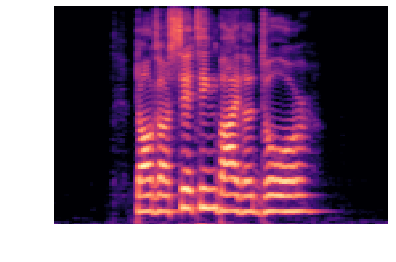

In [0]:
emotion = emotions[0]
print('\nEmotion: ' + emotion)
pathAudioEmotion = Path(pathAudio+emotion)
pathImageEmotion = Path(pathImage+emotion)
print(pathAudioEmotion)
print(pathImageEmotion)
print('\n\n')
audio_to_spectrogram(pathAudioEmotion, pathImageEmotion)

  0%|          | 0/81 [00:00<?, ?it/s]


Emotion: bored
datasets/kaymodb/bored
datasets/kaymodb_images/bored





100%|██████████| 81/81 [00:53<00:00,  1.07it/s]


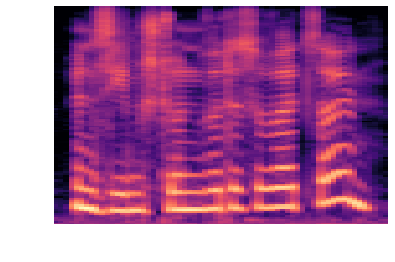

In [0]:
emotion = emotions[1]
print('\nEmotion: ' + emotion)
pathAudioEmotion = Path(pathAudio+emotion)
pathImageEmotion = Path(pathImage+emotion)
print(pathAudioEmotion)
print(pathImageEmotion)
print('\n\n')
audio_to_spectrogram(pathAudioEmotion, pathImageEmotion)

  0%|          | 0/100 [00:00<?, ?it/s]


Emotion: calm
datasets/kaymodb/calm
datasets/kaymodb_images/calm





100%|██████████| 76/76 [05:35<00:00,  4.80s/it]


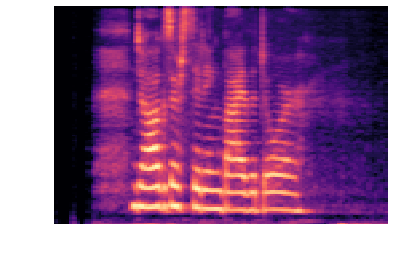

In [0]:
emotion = emotions[2]
print('\nEmotion: ' + emotion)
pathAudioEmotion = Path(pathAudio+emotion)
pathImageEmotion = Path(pathImage+emotion)
print(pathAudioEmotion)
print(pathImageEmotion)
print('\n\n')
audio_to_spectrogram(pathAudioEmotion, pathImageEmotion)

  0%|          | 0/100 [00:00<?, ?it/s]


Emotion: disgust
datasets/kaymodb/disgust
datasets/kaymodb_images/disgust





100%|██████████| 98/98 [05:01<00:00,  3.54s/it]


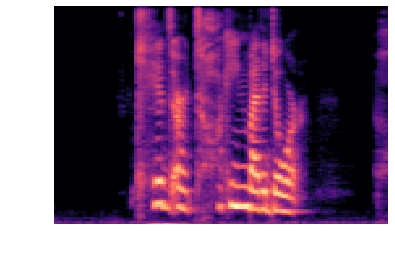

In [0]:
emotion = emotions[3]
print('\nEmotion: ' + emotion)
pathAudioEmotion = Path(pathAudio+emotion)
pathImageEmotion = Path(pathImage+emotion)
print(pathAudioEmotion)
print(pathImageEmotion)
print('\n\n')
audio_to_spectrogram(pathAudioEmotion, pathImageEmotion)

  0%|          | 0/100 [00:00<?, ?it/s]


Emotion: fearful
datasets/kaymodb/fearful
datasets/kaymodb_images/fearful





100%|██████████| 5/5 [00:27<00:00,  5.58s/it]


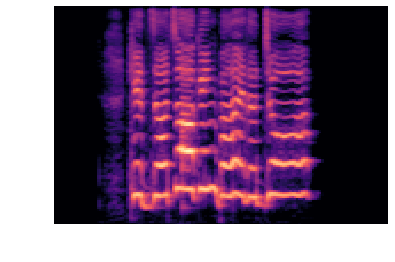

In [0]:
emotion = emotions[4]
print('\nEmotion: ' + emotion)
pathAudioEmotion = Path(pathAudio+emotion)
pathImageEmotion = Path(pathImage+emotion)
print(pathAudioEmotion)
print(pathImageEmotion)
print('\n\n')
audio_to_spectrogram(pathAudioEmotion, pathImageEmotion)

  0%|          | 0/100 [00:00<?, ?it/s]


Emotion: happy
datasets/kaymodb/happy
datasets/kaymodb_images/happy





100%|██████████| 7/7 [00:39<00:00,  5.65s/it]


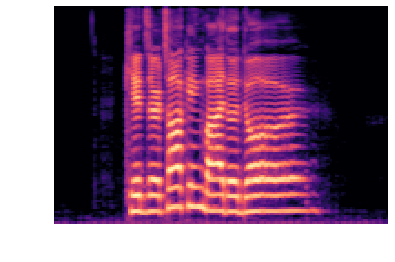

In [0]:
emotion = emotions[5]
print('\nEmotion: ' + emotion)
pathAudioEmotion = Path(pathAudio+emotion)
pathImageEmotion = Path(pathImage+emotion)
print(pathAudioEmotion)
print(pathImageEmotion)
print('\n\n')
audio_to_spectrogram(pathAudioEmotion, pathImageEmotion)

  0%|          | 0/100 [00:00<?, ?it/s]


Emotion: neutral
datasets/kaymodb/neutral
datasets/kaymodb_images/neutral





100%|██████████| 87/87 [05:35<00:00,  4.21s/it]


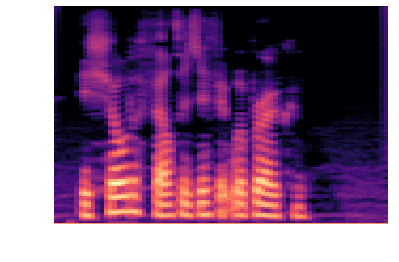

In [0]:
emotion = emotions[6]
print('\nEmotion: ' + emotion)
pathAudioEmotion = Path(pathAudio+emotion)
pathImageEmotion = Path(pathImage+emotion)
print(pathAudioEmotion)
print(pathImageEmotion)
print('\n\n')
audio_to_spectrogram(pathAudioEmotion, pathImageEmotion)

  0%|          | 0/100 [00:00<?, ?it/s]


Emotion: sad
datasets/kaymodb/sad
datasets/kaymodb_images/sad





100%|██████████| 98/98 [09:17<00:00,  6.33s/it]


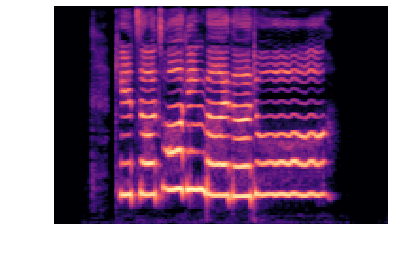

In [0]:
emotion = emotions[7]
print('\nEmotion: ' + emotion)
pathAudioEmotion = Path(pathAudio+emotion)
pathImageEmotion = Path(pathImage+emotion)
print(pathAudioEmotion)
print(pathImageEmotion)
print('\n\n')
audio_to_spectrogram(pathAudioEmotion, pathImageEmotion)

  0%|          | 0/100 [00:00<?, ?it/s]


Emotion: surprised
datasets/kaymodb/surprised
datasets/kaymodb_images/surprised





100%|██████████| 52/52 [02:31<00:00,  3.12s/it]


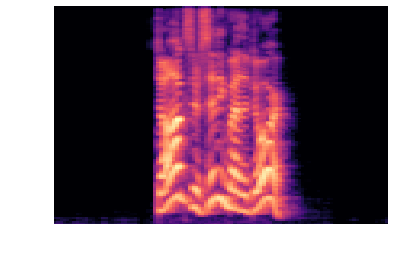

In [0]:
emotion = emotions[8]
print('\nEmotion: ' + emotion)
pathAudioEmotion = Path(pathAudio+emotion)
pathImageEmotion = Path(pathImage+emotion)
print(pathAudioEmotion)
print(pathImageEmotion)
print('\n\n')
audio_to_spectrogram(pathAudioEmotion, pathImageEmotion)

In [52]:
! find datasets/kaymodb_images/ -type f | wc -l

6270


In [0]:
## ZIP AND DOWNLOAD IMAGES! FINALYYYYYY!
!zip -r /content/kaymodb_images.zip /content/datasets/kaymodb_images/

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
!cp -r kaymodb_images.zip kaymodb.csv gdrive/My\ Drive/

## Training ResNet model using transfer learning

In [0]:
bs = 16
np.random.seed(42)
data = ImageDataBunch.from_folder(pathImage, train='.', valid_pct=0.1,
        ds_tfms=None, size=224, num_workers=4, bs=bs).normalize(imagenet_stats)

In [54]:
data.classes, data.c

(['angry',
  'bored',
  'calm',
  'disgust',
  'fearful',
  'happy',
  'neutral',
  'sad',
  'surprised'],
 9)

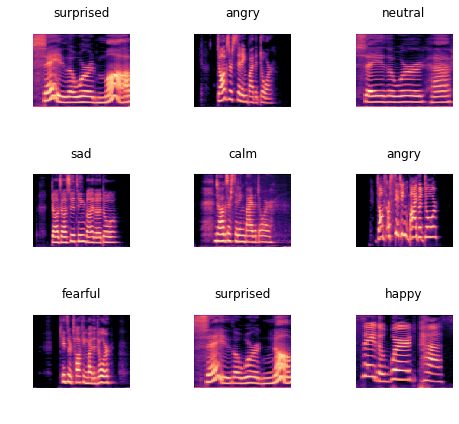

In [55]:
data.show_batch(rows=3, figsize=(7,6))

In [56]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:03<00:00, 27.3MB/s]


In [0]:
learn.model

In [57]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.479538,1.030233,0.662939,07:38
1,1.088240,0.836990,0.688498,07:39
2,0.784765,0.685690,0.746006,07:40
3,0.649122,0.634703,0.766773,07:38


In [0]:
learn.save('stage-1')

In [60]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

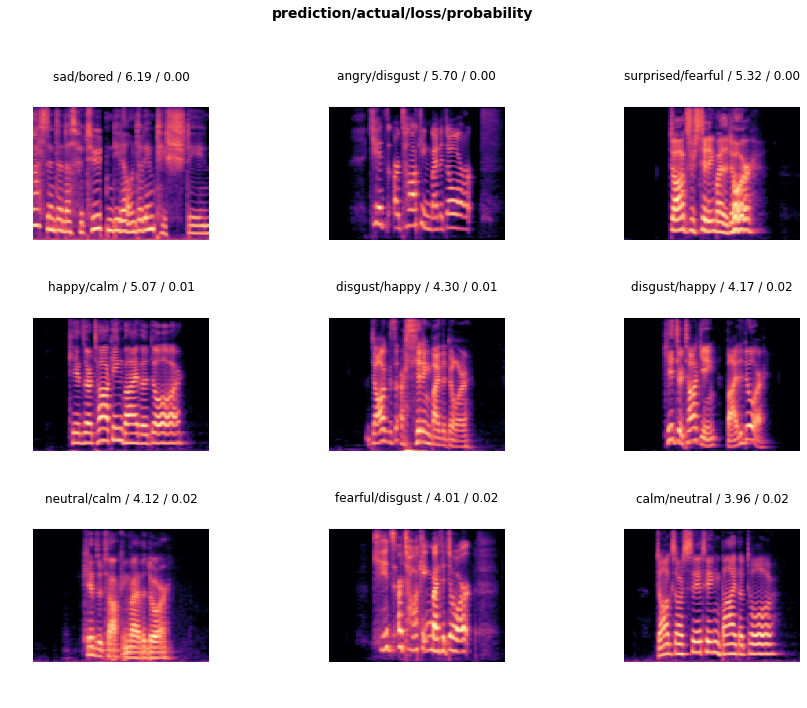

In [61]:
interp.plot_top_losses(9, figsize=(15,11))

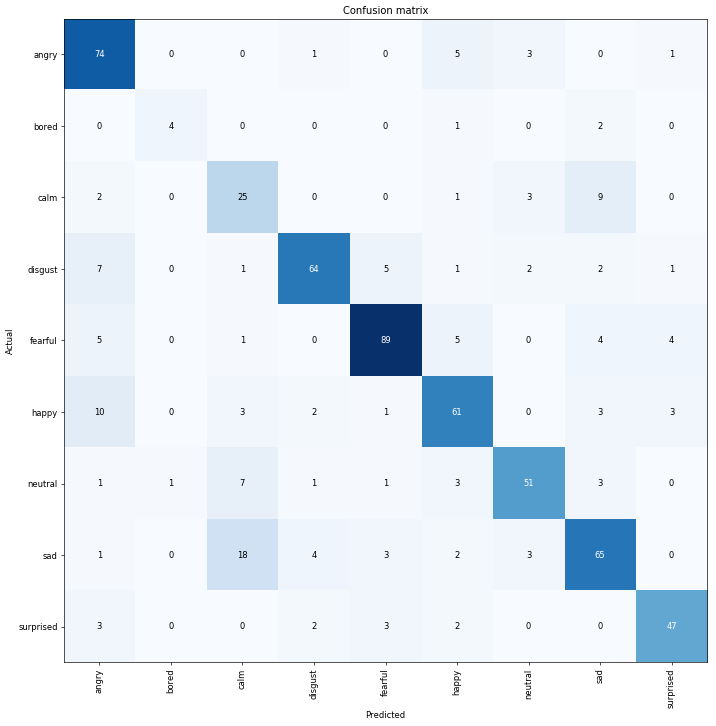

In [62]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [63]:
interp.most_confused(min_val=2)

[('sad', 'calm', 18),
 ('happy', 'angry', 10),
 ('calm', 'sad', 9),
 ('disgust', 'angry', 7),
 ('neutral', 'calm', 7),
 ('angry', 'happy', 5),
 ('disgust', 'fearful', 5),
 ('fearful', 'angry', 5),
 ('fearful', 'happy', 5),
 ('fearful', 'sad', 4),
 ('fearful', 'surprised', 4),
 ('sad', 'disgust', 4),
 ('angry', 'neutral', 3),
 ('calm', 'neutral', 3),
 ('happy', 'calm', 3),
 ('happy', 'sad', 3),
 ('happy', 'surprised', 3),
 ('neutral', 'happy', 3),
 ('neutral', 'sad', 3),
 ('sad', 'fearful', 3),
 ('sad', 'neutral', 3),
 ('surprised', 'angry', 3),
 ('surprised', 'fearful', 3),
 ('bored', 'sad', 2),
 ('calm', 'angry', 2),
 ('disgust', 'neutral', 2),
 ('disgust', 'sad', 2),
 ('happy', 'disgust', 2),
 ('sad', 'happy', 2),
 ('surprised', 'disgust', 2),
 ('surprised', 'happy', 2)]

## Unfreezing, fine-tuning, and learning rates

In [0]:
learn.unfreeze()

In [65]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.810510,0.562120,0.797125,07:40


In [66]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


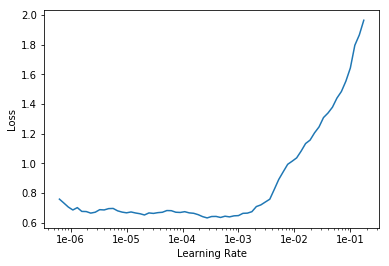

In [67]:
learn.recorder.plot()

In [68]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.546004,0.488243,0.803514,07:43
1,0.482031,0.457339,0.822684,07:42


## Training: resnet50

In [0]:
data = ImageDataBunch.from_folder(pathImage, train='.', valid_pct=0.1,
        ds_tfms=None, size=224, num_workers=4, bs=bs//2).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


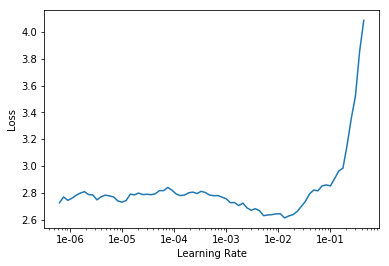

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,accuracy,time
0,1.984480,1.559647,0.442197,01:12
1,1.641453,1.428857,0.462428,01:08
2,1.483977,1.241431,0.543353,01:08
3,1.262527,1.184656,0.543353,01:08
4,1.035488,1.101711,0.595376,01:08
5,0.915015,1.088955,0.595376,01:08
6,0.740681,1.085069,0.595376,01:08
7,0.668262,1.053219,0.598266,01:08


In [0]:
learn.save('stage-1-50')

In [0]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,1.611341,1.490224,0.456647,01:37
1,1.331202,1.069754,0.612717,01:36
2,0.588949,0.870195,0.702312,01:36


In [0]:
learn.save('stage-1-50_2')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

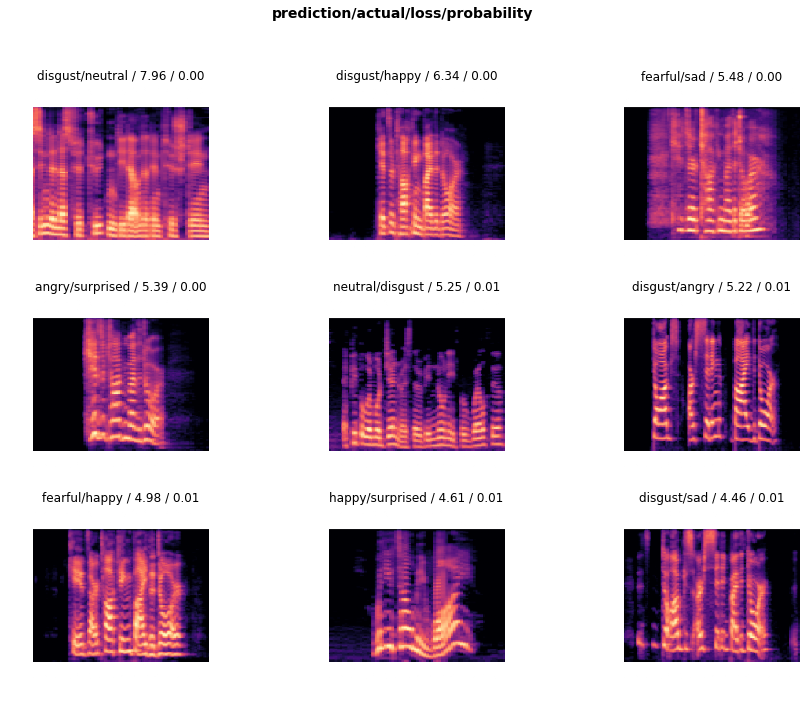

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

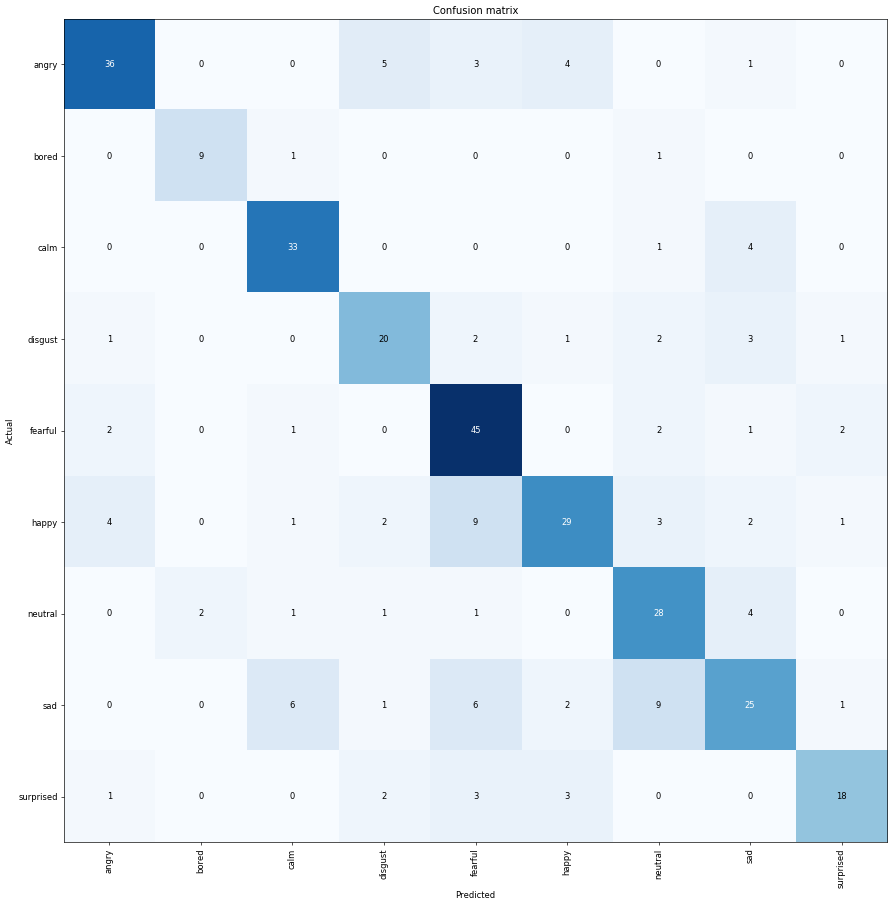

In [0]:
interp.plot_confusion_matrix(figsize=(15,15), dpi=60)

In [0]:
interp.most_confused(min_val=2)

[('happy', 'fearful', 9),
 ('sad', 'neutral', 9),
 ('sad', 'calm', 6),
 ('sad', 'fearful', 6),
 ('angry', 'disgust', 5),
 ('angry', 'happy', 4),
 ('calm', 'sad', 4),
 ('happy', 'angry', 4),
 ('neutral', 'sad', 4),
 ('angry', 'fearful', 3),
 ('disgust', 'sad', 3),
 ('happy', 'neutral', 3),
 ('surprised', 'fearful', 3),
 ('surprised', 'happy', 3),
 ('disgust', 'fearful', 2),
 ('disgust', 'neutral', 2),
 ('fearful', 'angry', 2),
 ('fearful', 'neutral', 2),
 ('fearful', 'surprised', 2),
 ('happy', 'disgust', 2),
 ('happy', 'sad', 2),
 ('neutral', 'bored', 2),
 ('sad', 'happy', 2),
 ('surprised', 'disgust', 2)]

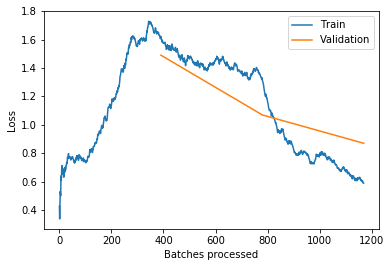

In [0]:
learn.recorder.plot_losses()

### Save models

In [0]:
!mkdir models/fastai_new

In [0]:
!cp datasets/kaymodb_images/models/* models/fastai_new/

In [0]:
!cp -r models/ gdrive/My\ Drive/KayMo